<a href="https://colab.research.google.com/github/19PA1A0484/survival-after-a-year/blob/main/19pa1a0484_best_F1_score_is_0_82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT NECCESARY BUILT IN LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

## **IMPORT DATA SET FROM THE LINK Survived 1 year DATA SET**
IMPORTING THE DATA

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


# **About the dataset**

**The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).**

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment

Survived_1_year == 1, implies that the patient survived after 1 year of treatment

In [ ]:
df.shape

(23097, 18)

In [ ]:
df.size

415746

In [ ]:
df.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

# **Data Description:**

D_Patient_Care_Situation: Care situation of a patient during treatment

Diagnosed_Condition: The diagnosed condition of the patient

ID_Patient: Patient identifier number

Treatment_with_drugs: Class of drugs used during treatment

Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

Patient_Age: Age of the patient

Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

Patient_Smoker: If the patient was a smoker or not

Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID_Patient_Care_Situation,23097.0,16545.712041,9532.263503,2.0000,8280.00000,16597.000000,24825.000000,33014.000000
Diagnosed_Condition,23097.0,26.413127,15.030865,0.0000,13.00000,26.000000,39.000000,52.000000
Patient_ID,23097.0,6261.280772,3595.990620,1.0000,3181.00000,6242.000000,9363.000000,12515.000000
Patient_Age,23097.0,33.209768,19.549882,0.0000,16.00000,33.000000,50.000000,149.000000
Patient_Body_Mass_Index,23097.0,23.454820,3.807661,1.0893,20.20555,23.386199,26.788154,29.999579
A,21862.0,0.897905,0.302780,0.0000,1.00000,1.000000,1.000000,1.000000
B,21862.0,0.136355,0.343173,0.0000,0.00000,0.000000,0.000000,1.000000
C,21862.0,0.185070,0.388363,0.0000,0.00000,0.000000,0.000000,1.000000
D,21862.0,0.083615,0.276817,0.0000,0.00000,0.000000,0.000000,1.000000
E,21862.0,0.393239,0.488480,0.0000,0.00000,0.000000,1.000000,1.000000


# **Data Cleaning**

In [ ]:
df.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
k=[ 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond']
for i in k:
  df[i].fillna(df[i].mean(),inplace=True)

In [ ]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.isna().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

# **Calcuating the value counts of survival_1_year **

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment =8494

Survived_1_year == 1, implies that the patient survived after 1 year of treatment =14603

In [ ]:
df.Survived_1_year.value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

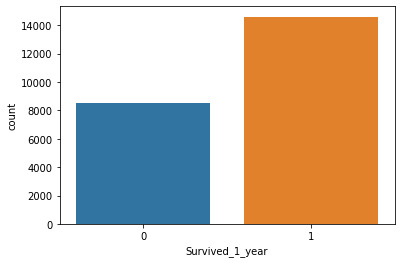

In [ ]:
sns.countplot(x="Survived_1_year",data=df)

In [ ]:
palette = {1: '#ff00a5', 2: '#4cff00'}

In [ ]:
df["Treated_with_drugs"].value_counts()

DX6                     8619
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

**to make predictive models we have to convert categorical data into numeric form.**

In [ ]:
df.Patient_Rural_Urban.value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=["Patient_Rural_Urban"])
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,22374,8,3333,DX6,56,18.479385,YES,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1
1,18164,5,5740,DX2,36,22.945566,YES,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0
2,6283,23,10446,DX6,48,27.510027,YES,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0
3,5339,51,12011,DX1,5,19.130976,NO,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0


In [ ]:
df=pd.get_dummies(df,columns=["Patient_Smoker"])
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_mental_condition,A,B,C,...,E,F,Z,Number_of_prev_cond,Survived_1_year,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES
0,22374,8,3333,DX6,56,18.479385,Stable,1.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0,0,1,0,0,1
1,18164,5,5740,DX2,36,22.945566,Stable,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,1,0,0,0,1
2,6283,23,10446,DX6,48,27.510027,Stable,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,1,0,0,0,1
3,5339,51,12011,DX1,5,19.130976,Stable,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0,1,0,1,0
4,33012,0,12513,DX6,128,1.348400,Stable,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1,1,0,1,0,0


In [ ]:
df.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z',
       'Number_of_prev_cond', 'Survived_1_year', 'Patient_Rural_Urban_RURAL',
       'Patient_Rural_Urban_URBAN', 'Patient_Smoker_Cannot say',
       'Patient_Smoker_NO', 'Patient_Smoker_YES'],
      dtype='object')

# **Data Analysis & Visualization**

**The below pie chart represents that the max area shows the people survive after 1 year of treatment and green represents the people not survive after 1 year of treatment**

In [ ]:
livProb = df['Survived_1_year'].value_counts()

fig = go.Figure()
fig.add_pie(labels=livProb.index, values=livProb.values, marker={'colors': list(palette.values())})
fig.update_layout(title='Frequency of survival', width=768, height=512)
fig.update_traces(titlefont_size=20, textfont_size=16, marker=dict(line=dict(color='#000000', width=1)))
fig.show()

**BELOW BAR CHART SHOWS RELATION BETWEEN THE Survived_1_year and Diagnosed_Condition**

**It shows that diagnosed condition has less impact on surviaval year. The survival year is more when diagnised condition is zero**

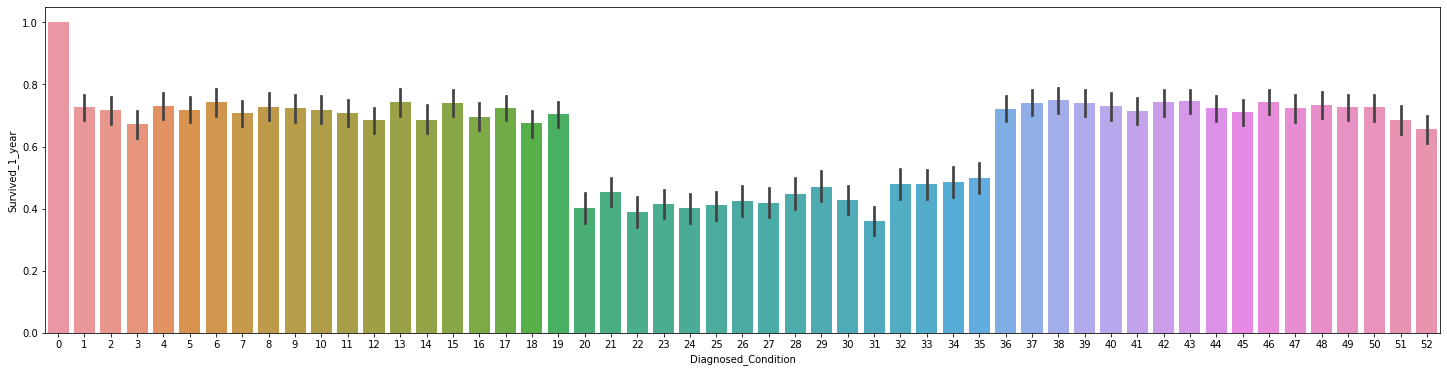

In [ ]:
fig = plt.figure(figsize=(25, 6))
sns.barplot(x="Diagnosed_Condition",y='Survived_1_year',data=df)
plt.show()

**BELOW BAR CHART SHOWS RELATION BETWEEN THE Survived_1_year and Treated_with_drugs**

**It shows that using of drugs shows more impact on surviaval year. The survival year is more when more drugs are used**

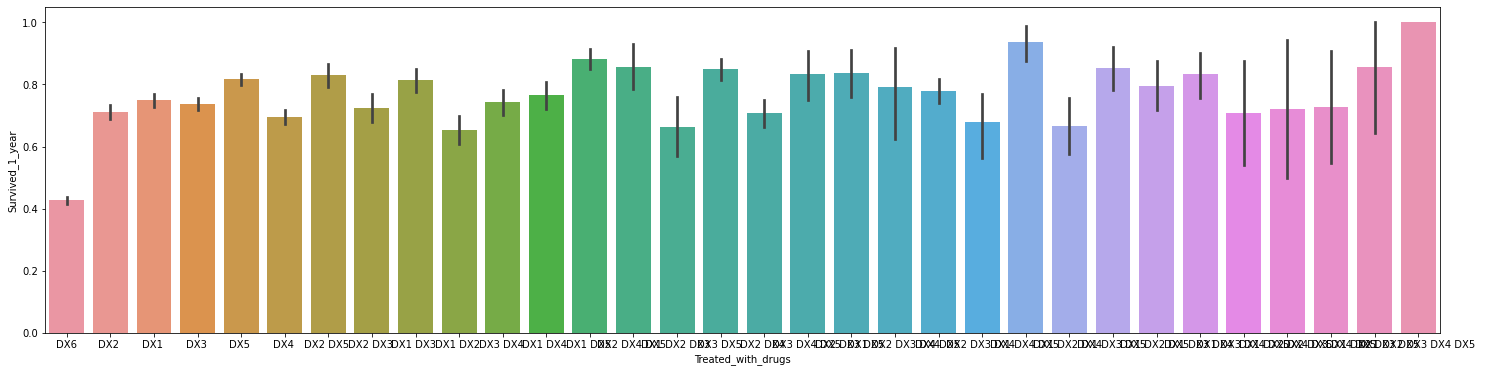

In [ ]:
fig = plt.figure(figsize=(25, 6))
sns.barplot(x="Treated_with_drugs",y='Survived_1_year',data=df)
plt.show()

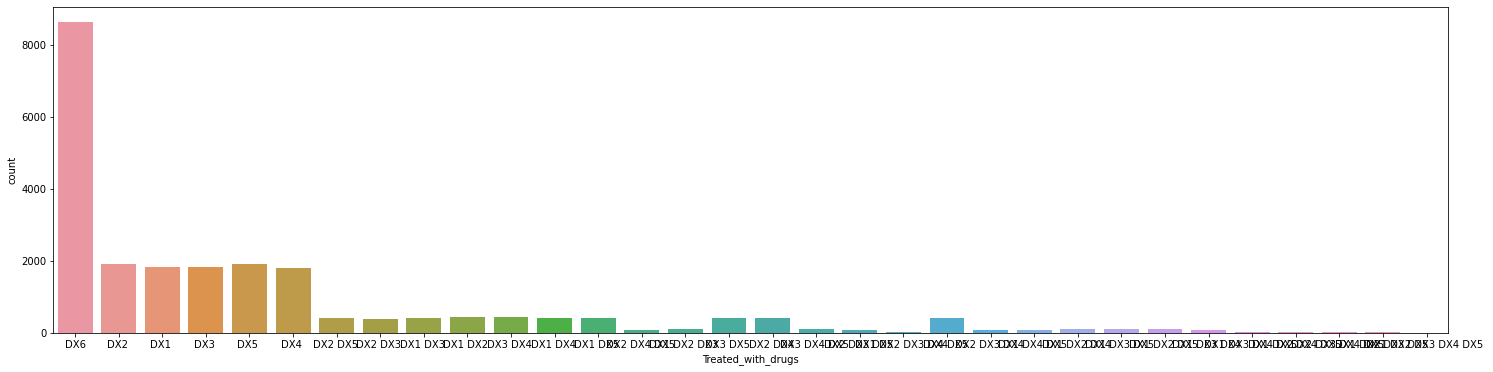

In [ ]:
fig = plt.figure(figsize=(25, 6))
sns.countplot(x="Treated_with_drugs",data=df)
plt.show()

<Figure size 2880x432 with 0 Axes>

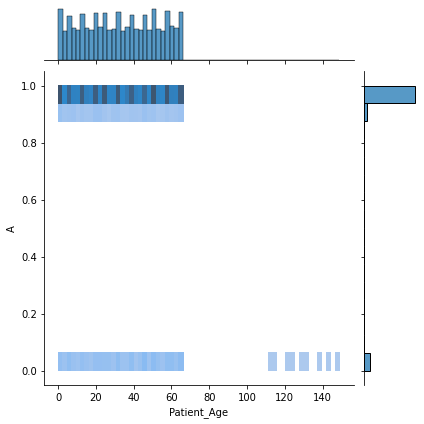

In [ ]:
fig = plt.figure(figsize=(40, 6))
sns.jointplot(x="Patient_Age",y='A',data=df,kind="hist")
plt.show()

In [ ]:
df.reset_index(drop=True,inplace=True)

# **FEATURE ENGINEERING**

In [ ]:
y=df['Survived_1_year']
x=df.drop(columns='Survived_1_year')

In [ ]:
x=pd.get_dummies(x,columns=["Patient_mental_condition"])

In [ ]:
x=x.drop(columns='Treated_with_drugs')

# **PROCESSING THE MODEL**

In [ ]:
 from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.611441,-1.225048,-0.814336,1.165773,-1.306719,0.346593,-0.408415,-0.489825,-0.310482,1.276771,-0.244854,-0.025072,0.332952,-1.522204,1.522204,-0.023731,-1.159584,1.160919,0.0
1,0.169773,-1.424641,-0.144965,0.142727,-0.133747,0.346593,-0.408415,-0.489825,-0.310482,-0.827471,-0.244854,-0.025072,-1.001419,0.656942,-0.656942,-0.023731,-1.159584,1.160919,0.0
2,-1.076652,-0.227079,1.163743,0.756555,1.065036,0.346593,-0.408415,-0.489825,-0.310482,-0.827471,-0.244854,-0.025072,-1.001419,0.656942,-0.656942,-0.023731,-1.159584,1.160919,0.0
3,-1.175687,1.635794,1.598960,-1.442995,-1.135589,0.346593,-0.408415,-0.489825,-0.310482,-0.827471,-0.244854,-0.025072,-1.001419,-1.522204,1.522204,-0.023731,0.862378,-0.861386,0.0
4,1.727464,-1.757297,1.738563,4.848739,-5.805900,-3.048217,-0.408415,-0.489825,-0.310482,-0.827471,-0.244854,42.138294,-1.001419,0.656942,-0.656942,42.138964,-1.159584,-0.861386,0.0


# **LOGISTIC REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4027795,random_state=142)
x_test.shape
y_test.shape

(9303,)

In [ ]:
lr=LogisticRegression()

In [ ]:
SMT = SMOTE(random_state=42)
x_train_SMOTE, y_train_SMOTE = SMT.fit_resample(x_train, y_train)

# **APPLYING GRID SEARCH AND PREDICTING THE MODEL USING LOGISTIC REGRESSION**

In [ ]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': range(100, 800, 100)}
LogReg = GridSearchCV(lr, params)
LogReg.fit(x_train, y_train)
y_pred = LogReg.predict(x_test)

**ACCURACY AND CLASSIFICATION REPORT OF THE MODEL USING LOGISTIC REGESSION**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.41      0.50      3360
           1       0.72      0.88      0.79      5943

    accuracy                           0.71      9303
   macro avg       0.69      0.64      0.65      9303
weighted avg       0.70      0.71      0.69      9303



# **F1 score is 0.78**

In [ ]:
from sklearn.metrics import f1_score
print('F1 is: ', f1_score(y_test, y_pred))

F1 is:  0.7924212448637955


In [ ]:
print(accuracy_score(y_test,y_pred))

0.7067612598086639


**confusion matrix plot and roc curve using logistic regression**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



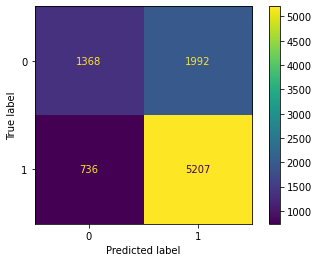

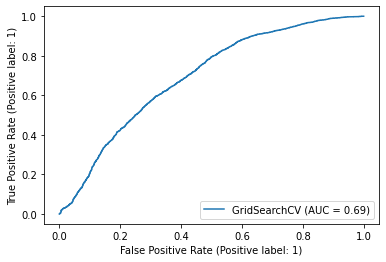

In [ ]:
print(plot_confusion_matrix(LogReg,x_test,y_test))
plot_roc_curve(LogReg,x_test,y_test)

In [ ]:
LogReg.best_params_

{'C': 0.01, 'max_iter': 100}

# **DECISION TREE CLASSIFICATION**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58      3360
           1       0.76      0.75      0.75      5943

    accuracy                           0.69      9303
   macro avg       0.67      0.67      0.67      9303
weighted avg       0.69      0.69      0.69      9303



# **F1 score is given as 0.74**

In [ ]:
from sklearn.metrics import f1_score
print('F1 is: ', f1_score(y_test, y_pred))

F1 is:  0.7545144804088586


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



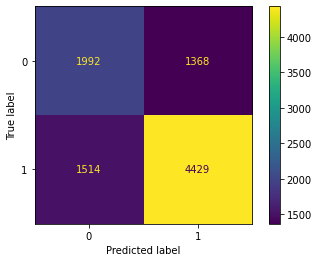

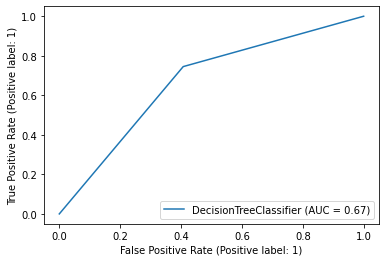

In [ ]:
print(plot_confusion_matrix(dtc,x_test,y_test))
plot_roc_curve(dtc,x_test,y_test)

In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  1992 
False positives:  1368 
False negatives:  1514 
True Positives:  4429


In [ ]:
from sklearn.metrics import precision_score, recall_score
print('Precision is: ', precision_score(y_test, y_pred))
print('Recall is: ', recall_score(y_test, y_pred))

Precision is:  0.7640158702777299
Recall is:  0.7452465084973919


In [ ]:
accuracy_score(y_test,y_pred)

0.690207459959153

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data= export_graphviz(dtc, out_file=None,
feature_names=x_test.columns,
class_names=['0', '1'],
filled=True, rounded=True,
special_characters=True)

In [ ]:
graph1=graphviz.Source(dot_data)

# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66      3360
           1       0.80      0.86      0.83      5943

    accuracy                           0.77      9303
   macro avg       0.75      0.73      0.74      9303
weighted avg       0.76      0.77      0.76      9303



# **F1 score is 0.82**

In [ ]:
from sklearn.metrics import f1_score
print('F1 is: ', f1_score(y_test, y_pred))

F1 is:  0.8262029923170239


In [ ]:
accuracy_score(y_test,y_pred)

0.7689992475545523

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



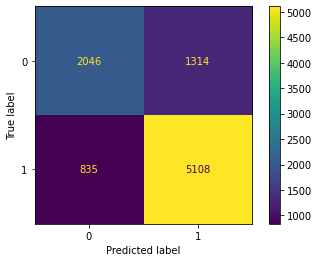

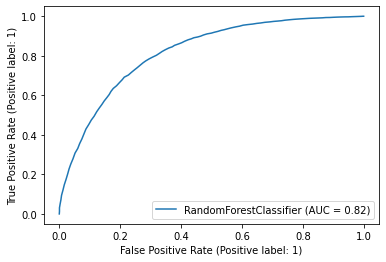

In [ ]:
print(plot_confusion_matrix(rfc,x_test,y_test))
plot_roc_curve(rfc,x_test,y_test)

In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  2046 
False positives:  1314 
False negatives:  835 
True Positives:  5108


In [ ]:
from sklearn.metrics import precision_score, recall_score
print('Precision is: ', precision_score(y_test, y_pred))
print('Recall is: ', recall_score(y_test, y_pred))

Precision is:  0.79539084397384
Recall is:  0.8594985697459195


# **AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abd=AdaBoostClassifier()
abd.fit(x_train,y_train)
y_pred=abd.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7731914436203375

# **F1 score is .82**

In [ ]:
from sklearn.metrics import f1_score
print('F1 is: ', f1_score(y_test, y_pred))

F1 is:  0.8269640806954239


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



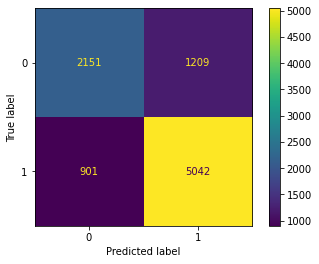

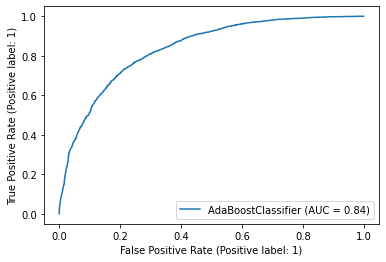

In [ ]:
print(plot_confusion_matrix(abd,x_test,y_test))
plot_roc_curve(abd,x_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      3360
           1       0.81      0.85      0.83      5943

    accuracy                           0.77      9303
   macro avg       0.76      0.74      0.75      9303
weighted avg       0.77      0.77      0.77      9303



In [ ]:
y_test=y_test.values.reshape(-1,1)
predict=rfc.predict(x_test)

In [ ]:
b=pd.DataFrame({'predicted':predict.flatten(), 'Actual':y_test.flatten()})
y_test = pd.Series(rfc.predict(x_test), name='prediction')

In [ ]:
y_test.to_csv("subbu.csv",index=False)

In [ ]:
y_test.value_counts()

1    6422
0    2881
Name: prediction, dtype: int64